In [1]:
import pandas as pd
import torch
from transformers import AutoTokenizer

from safe_rlhf.datasets import SupervisedToolsDataset

model_name_or_path = "Team-ACE/ToolACE-2-Llama-3.1-8B"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=True)
tokenizer.model_max_length = 4096
# Instead of "datasets=...", use the correct parameter:
train_dataset = SupervisedToolsDataset(
    [
        ("tools", 0.1),

        # If you have multiple, you can specify [("Foo", 0.6), ("Bar", 0.4), ...]
    ],
    tokenizer=tokenizer,
    lazy_tokenization=False,
    seed=42,
)

/home/panda/miniconda3/envs/pda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-05-07 20:29:24,879] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/panda/miniconda3/envs/pda/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/panda/miniconda3/envs/pda/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status
Preprocessing raw dataset...: 100%|██████████| 1130/1130 [00:03<00:00, 365.56it/s]


In [8]:
for num, token in enumerate(train_dataset.data[0]['input_ids']):
    # Do something with the token
    print(token.item(),tokenizer.decode(token.item()),train_dataset.data[0]['labels'][num].item())


128000 <|begin_of_text|> -100
128006 <|start_header_id|> -100
9125 system -100
128007 <|end_header_id|> -100
271 

 -100
38766 Cut -100
1303 ting -100
33025  Knowledge -100
2696  Date -100
25 : -100
6790  December -100
220   -100
2366 202 -100
18 3 -100
198 
 -100
15724 Today -100
2696  Date -100
25 : -100
220   -100
1627 26 -100
10263  Jul -100
220   -100
2366 202 -100
19 4 -100
271 

 -100
2675 You -100
527  are -100
459  an -100
6335  expert -100
304  in -100
76978  composing -100
5865  functions -100
13 . -100
1472  You -100
527  are -100
2728  given -100
264  a -100
3488  question -100
323  and -100
264  a -100
743  set -100
315  of -100
3284  possible -100
5865  functions -100
13 . -100
720  
 -100
29815 Based -100
389  on -100
279  the -100
3488  question -100
11 , -100
499  you -100
690  will -100
1205  need -100
311  to -100
1304  make -100
832  one -100
477  or -100
810  more -100
734  function -100
76127 /tool -100
6880  calls -100
311  to -100
11322  achieve -100
279  the -

In [21]:
import numpy as np
train_dataset.data[11035]['input_ids']

tensor([    1, 22815, 29940,  ...,   360,  1696,  1102])

In [22]:
np.array([len(d['input_ids']) > 1024 for d in train_dataset.data]).argmax()

np.int64(0)

In [23]:
print(tokenizer.decode(train_dataset.data[11035]['input_ids']))

<s> BEGINNING OF CONVERSATION: USER: Generate a 10 annotated bibliography given the information below. The impacts of Climate Change on Human Health ASSISTANT:1. Anderson, B. (2012). Climate Change and Human Health: Impacts, Vulnerabilities, and Mitigation. Environmental Health Perspectives, 120(7), 911-19.
This paper discusses the link between climate change and public health with an emphasis on impacts, vulnerabilities, and strategies for adaptation and mitigation. It aims to make impacts more tangible, while also highlighting the need to ensure that adaptive mechanisms are in place.

2. Ebi, K. L. (2008). Human health in a changing climate. Environmental impact assessment review, 28(3-4), 191-198.
This article discusses the potential effects of climate change on human health and how it will vary according to the different variables of the environment. It provides an overview of the main diseases that are likely to be impacted, such as malaria and malnutrition. 

3. Friel, Sharon & M

In [103]:
train_dataset.data[1]['input_ids']

tensor([    1, 22815, 29940,  4214,  8079,  8707,  5348, 29903,  8098, 29901,
         3148,  1001, 29901, 25589,  7118,  2211,  5837,   310, 16743,   411,
         7243, 24552,  9950, 12137, 29889,   319,  1799,  9047, 13566, 29901,
        29896, 29889, 22096,   277,   675,  5622, 16706,   448, 11190,  4943,
        16706, 10106,   278,  2462,   304, 26681, 29892,  2125,   263,  6686,
        29892,   470,   437,  1554,  1683,   366, 13389, 29889,    13, 29906,
        29889,   830,   496,   714,   953,  8194,   635,   448,   323,  2235,
          304,  7875,   322,  3942, 25704,   304,  7952,  6631,   322,   304,
         6232,   596, 13133,   322,  6365,  2722, 29889,    13, 29941, 29889,
        11190,  2562,   310,   596,  9128,  9045,   448,  1222,  6269,   895,
        25704,   322, 17545, 18254,   768,  2738,  9687, 29879,   304,  6795,
          627,   278,  9545,   310,  7243, 24552,  9950, 12137,   322, 14505,
          596,   286,  2092, 21106, 29879, 29958])

In [121]:
tokenizer('Hola.')

{'input_ids': [1, 1, 29950, 2963, 29889], 'attention_mask': [1, 1, 1, 1, 1]}

In [112]:
tokenizer.special_tokens_map


{'bos_token': '<s>',
 'eos_token': '</s>',
 'unk_token': '<unk>',
 'pad_token': '<pad>'}

In [99]:
train_dataset.data[0]['input_ids']

tensor([    1, 22815, 29940,  4214,  8079,  8707,  5348, 29903,  8098, 29901,
         3148,  1001, 29901, 26849,   263,  9522,   412,   363,  3907, 26163,
         5036, 29889,   319,  1799,  9047, 13566, 29901,   797, 29887,  1127,
        10070, 29901,    13, 29941,  2723,   567,   599, 29899, 15503,  4220,
         1652,   473,    13, 29896, 29914, 29906,   734,   294,  1129,   265,
        15795,    13, 29941, 29914, 29946, 18002, 18655,   519,  3273,  8333,
           13, 29906,  6131,  1129,   787,  4796, 26438,    13, 29955,  6131,
         1129,   787, 14890, 29899, 29883,  1025,  4094,    13, 29953, 29899,
        29955, 13914,   623,   793, 29892,  1236, 29872,   839,   322,   269,
          506,   287,    13, 29896, 29914, 29946, 18002,  4796, 26438,    13,
        29896, 29914, 29946,   734,   294,  1129,   265,  5962, 18254, 29885,
          387,    13, 29896, 29914, 29946,   734,   294,  1129,   265,  5962,
          274,  2559,   314,   265,    13, 29896,   734,   294, 

In [8]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=1,
    collate_fn=train_dataset.get_collator(),
    shuffle=True,
)

# 3. Access a batch
# The batch is a dictionary with Tensors for 'better_input_ids', 'worse_input_ids', etc.
batch = next(iter(train_dataloader))
print("Keys in batch:", batch.keys())

for key, val in batch.items():
    print(key, val.shape, val.dtype,val[0])



Keys in batch: dict_keys(['input_ids', 'labels', 'attention_mask', 'safe'])
input_ids torch.Size([1, 83]) torch.int64 tensor([    1, 22815, 29940,  4214,  8079,  8707,  5348, 29903,  8098, 29901,
         3148,  1001, 29901,  3251,   403,   263,  1051,   310, 22095,   304,
        15649,   363,   263,  2211, 29899,  6360, 29899,  1025,  8023, 29889,
          319,  1799,  9047, 13566, 29901, 29909,  1051,   310, 22095,   304,
        15649,   363,   263,  2211, 29899,  6360, 29899,  1025,  8023,  7805,
          528,   381,  1372, 29892,  3273, 29879, 29892,   282,  1934, 29892,
         7901, 10412, 29892, 28015,  1691, 29892,   325,  9197, 29892,   282,
         1175,   314,   294, 29892,   577,  4684, 29892,   322, 17394,   267,
        21106, 29879, 29958])
labels torch.Size([1, 83]) torch.int64 tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -10

In [9]:
tokenizer.decode(batch["input_ids"][0], skip_special_tokens=True)

'BEGINNING OF CONVERSATION: USER: Generate a list of clothes to buy for a three-year-old boy. ASSISTANT:A list of clothes to buy for a three-year-old boy includes shirts, shorts, pants, sweaters, jackets, vests, pajamas, socks, and shoes.</s>'

In [ ]:
from safe_rlhf.models import AutoModelForScore, load_pretrained_models

reward_model, reward_tokenizer = load_pretrained_models(
    'PKU-Alignment/beaver-7b-v1.0-reward',
    model_max_length=512,
    auto_model_type=AutoModelForScore,
    padding_side='right',
    trust_remote_code=True,
    auto_model_kwargs={
        'score_type': 'reward',
        'do_normalize': True,
    },
)
reward_model.set_normalize(True)
reward_model.cuda()

[2025-04-29 19:05:38,832] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/panda/miniconda3/envs/pda/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/panda/miniconda3/envs/pda/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status
/home/panda/miniconda3/envs/pda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

In [3]:
import os

rewards_cache_path = "scripts/cache/cached_rewards.pt"

# Load cached rewards if available and not recomputing
if os.path.exists(rewards_cache_path):
    print(f"Loading cached rewards from {rewards_cache_path}")
    rewards = torch.load(rewards_cache_path)
    print("Loaded cached rewards successfully")


cost_cache_path = "scripts/cache/cached_costs.pt"

# Load cached rewards if available and not recomputing
if os.path.exists(cost_cache_path):
    print(f"Loading cached cost from {cost_cache_path}")
    cost = torch.load(cost_cache_path)
    print("Loaded cached cost successfully")

Loading cached rewards from scripts/cache/cached_rewards.pt
Loaded cached rewards successfully
Loading cached cost from scripts/cache/cached_costs.pt
Loaded cached cost successfully


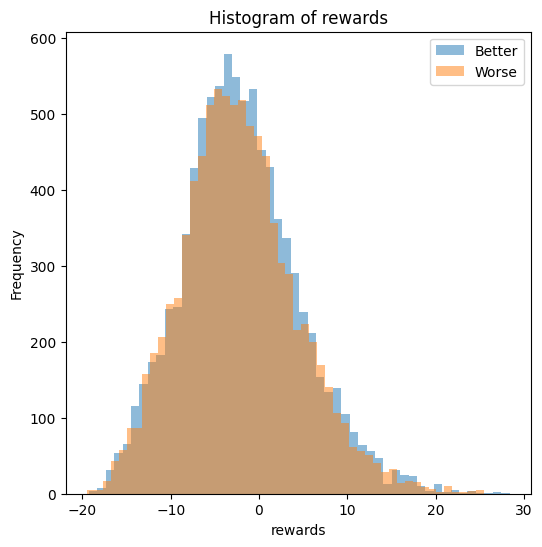

In [4]:
# Plot the cocient of rewards column0 vs column1
import matplotlib.pyplot as plt
import numpy as np
import torch


rewards_plot = rewards.cpu().numpy()
# Histogram of costs safwe and unsafe
plt.figure(figsize=(6, 6))
plt.hist(rewards_plot[:,0], bins=50, alpha=0.5)
plt.hist(rewards_plot[:,1], bins=50, alpha=0.5)
plt.legend(["Better", "Worse"])
plt.xlabel("rewards")
plt.ylabel("Frequency")
plt.title("Histogram of rewards")
plt.show()




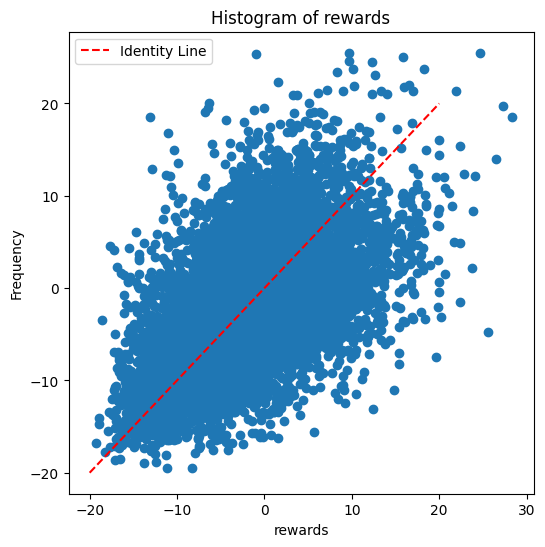

In [5]:


rewards_plot = rewards.cpu().numpy()
# Histogram of costs safwe and unsafe
plt.figure(figsize=(6, 6))
plt.scatter(rewards_plot[:,0],rewards_plot[:,1])
# Add comparison vs identity line
plt.plot([-20, 20], [-20, 20], color='red', linestyle='--', label='Identity Line')
plt.legend()
plt.xlabel("rewards")
plt.ylabel("Frequency")
plt.title("Histogram of rewards")
plt.show()



In [6]:

better_safe_list = []
for i in train_dataset.data:
    better_safe_list.append(i['better_safe'])

worse_safe_list = []
for i in train_dataset.data:
    worse_safe_list.append(i['worse_safe'])
cost_plot = cost.cpu().numpy()
cost_plot_safe_better = cost_plot[np.array(better_safe_list), 0]
cost_plot_safe_worse = cost_plot[np.array(worse_safe_list), 1]
cost_plot_safe = np.concatenate((cost_plot_safe_better, cost_plot_safe_worse), axis=0)

cost_plot_unsafe_better = cost_plot[~np.array(better_safe_list),0]
cost_plot_unsafe_worse = cost_plot[~np.array(worse_safe_list), 1]
cost_plot_unsafe = np.concatenate((cost_plot_unsafe_better, cost_plot_unsafe_worse), axis=0)


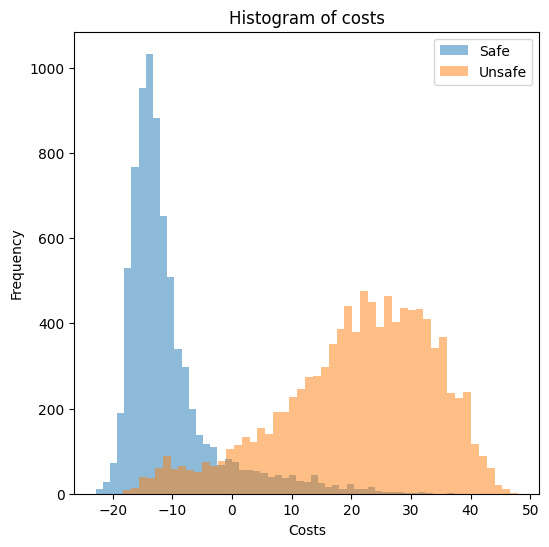

In [7]:
# Histogram of costs safwe and unsafe
plt.figure(figsize=(6, 6))
plt.hist(cost_plot_safe, bins=50, alpha=0.5)
plt.hist(cost_plot_unsafe, bins=50, alpha=0.5)
plt.legend(["Safe", "Unsafe"])
plt.xlabel("Costs")
plt.ylabel("Frequency")
plt.title("Histogram of costs")
plt.show()


In [18]:
from datasets import load_dataset

data_dir = "red-team-attempts"

dataset = load_dataset("Anthropic/hh-rlhf", split="train")
# Print the number of samples in the dataset
print("Number of samples in the dataset:", len(dataset))
dataset = load_dataset("Anthropic/hh-rlhf", split="test")
# Print the number of samples in the dataset
print("Number of samples in the dataset:", len(dataset))

Generating test split: 100%|██████████| 8552/8552 [00:00<00:00, 123128.13 examples/s]


Number of samples in the dataset: 160800
Number of samples in the dataset: 8552


In [4]:
from safe_rlhf.utils import gather_log_probabilities, get_all_reduce_mean
from safe_rlhf.utils import to_device
from torch.utils.data.distributed import DistributedSampler
import pandas as pd
import torch
from transformers import AutoTokenizer
from safe_rlhf.models import AutoModelForScore, load_pretrained_models

from safe_rlhf.datasets import PointwiseSafeDatasetOurs
from torch.utils.data import DataLoader
from peft import LoraConfig, get_peft_model

from transformers import AutoModelForCausalLM, get_scheduler
import os
device = 'cuda' if torch.cuda.is_available() else 'cpu'


eval_baseline_cache_path = os.path.join('scripts/cache', "cached_baseline_logprobs_test.pt")
baseline_logprobs_eval = torch.load(eval_baseline_cache_path, map_location=device)


model, tokenizer = load_pretrained_models(
    'PKU-Alignment/alpaca-7b-reproduced',
    model_max_length=512,
    padding_side='right',
    auto_model_type=AutoModelForCausalLM,
    trust_remote_code=True,
)

# model = get_peft_model(
#     model,
#     LoraConfig(
#         r=32,
#         lora_alpha=32,
#         lora_dropout=0.1,
#         target_modules=[
#             "q_proj",
#             "k_proj",
#             "v_proj",
#             "o_proj",
#             "gate_proj",
#             "down_proj",
#             "up_proj",
#             "lm_head",
#         ],
#     ),
# )
model.to(device)


eval_dataset = PointwiseSafeDatasetOurs(
                    [('chiche/test',1.0)],
                    tokenizer=tokenizer,
                    lazy_tokenization=False,
                    seed=42,
                )

eval_dataloader = DataLoader(
    eval_dataset,
    collate_fn=eval_dataset.get_collator(),
    batch_size=1,
)

safe_ratio_hist = []
unsafe_ratio_hist = []
safe_count = 0
unsafe_count = 0

with torch.no_grad():
    for batch in eval_dataloader:
        batch = to_device(batch, device)
        model_inputs = torch.cat([batch["safe_input_ids"], batch["unsafe_input_ids"]], dim=0)
        mask_inputs = torch.cat([batch["safe_attention_mask"], batch["unsafe_attention_mask"]], dim=0)
        logits = (model.module if hasattr(model, "module") else model)(
            model_inputs, attention_mask=mask_inputs
        ).logits
        sequence_log_probs = gather_log_probabilities(logits[:, :-1], model_inputs[:, 1:])
        better_seq_lp, worse_seq_lp = sequence_log_probs.chunk(chunks=2, dim=0)
        safe_log_prob = (better_seq_lp * batch["safe_attention_mask"][:, 1:] * batch["response_masks"][:, 1:]).sum(dim=1)
        unsafe_log_prob = (worse_seq_lp * batch["unsafe_attention_mask"][:, 1:] * batch["response_masks"][:, 1:]).sum(dim=1)

        # Use saved baseline
        ref_safe_lp = baseline_logprobs_eval[batch["index"], 0]
        ref_unsafe_lp = baseline_logprobs_eval[batch["index"], 1]

        safe_ratio = safe_log_prob - ref_safe_lp.to(device)
        unsafe_ratio = unsafe_log_prob - ref_unsafe_lp.to(device)

        safe_ratio_hist.append(safe_ratio.sum().item())
        unsafe_ratio_hist.append(unsafe_ratio.sum().item())

        safe_count += safe_ratio.numel()
        unsafe_count += unsafe_ratio.numel()
    safe_ratio_hist = torch.tensor(safe_ratio_hist, device=device)
    unsafe_ratio_hist = torch.tensor(unsafe_ratio_hist, device=device)
    safe_count = torch.tensor(safe_count, device=device)
    unsafe_count = torch.tensor(unsafe_count, device=device)
    safe_ratio = safe_ratio_hist.sum() / safe_count
    unsafe_ratio = unsafe_ratio_hist.sum() / unsafe_count

Preprocessing raw dataset...: 100%|██████████| 342/342 [00:00<00:00, 939.73it/s]


In [82]:
from safe_rlhf.utils import gather_log_probabilities, get_all_reduce_mean
from safe_rlhf.utils import to_device
from torch.utils.data.distributed import DistributedSampler
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoConfig
from safe_rlhf.models import AutoModelForScore, load_pretrained_models

from safe_rlhf.datasets import PointwiseSafeDatasetOurs
from torch.utils.data import DataLoader
from peft import LoraConfig, get_peft_model

from transformers import AutoModelForCausalLM, get_scheduler
import os

from peft import AutoPeftModelForCausalLM


model, tokenizer = load_pretrained_models(
        'PKU-Alignment/beaver-7b-v1.0', # huggyllama/llama-7b # /home/panda/pda/pd-alignment/output/sft-safe-v2/run-20250429-200602
        auto_device_mapping=True,
        auto_model_type = AutoModelForCausalLM,
        trust_remote_code=True,
    )

Loading checkpoint shards: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


In [83]:
from safe_rlhf.configs.constants import PROMPT_INPUT

prompt = PROMPT_INPUT.format(input='Hello')
input_ids = to_device(
    tokenizer(prompt, return_tensors='pt'),
    device=('cuda' if torch.cuda.is_available() else None),
)
output_ids = model.generate(
    **input_ids,
    max_length=64,
)

In [84]:
tokenizer.decode(input_ids['input_ids'][0])

'<s> BEGINNING OF CONVERSATION: USER: Hello ASSISTANT:'

In [88]:
output_ids[0]

tensor([    1, 22815, 29940,  4214,  8079,  8707,  5348, 29903,  8098, 29901,
         3148,  1001, 29901, 15043,   319,  1799,  9047, 13566, 29901, 10994,
          727, 29991,  1128,   508,   306,  1371,   366, 29973,     2],
       device='cuda:0')

In [86]:
tokenizer.decode(output_ids[0])

'<s> BEGINNING OF CONVERSATION: USER: Hello ASSISTANT:Hello there! How can I help you?</s>'

In [48]:
tokenizer('vda')

{'input_ids': [1, 325, 1388], 'attention_mask': [1, 1, 1]}

In [37]:
model.get_input_embeddings()


Embedding(32001, 4096, padding_idx=0)

In [55]:
import json
data = json.load(open('/home/panda/safety-tuned-llamas/data/training/saferpaca_Instructions_100.json', 'rb'))

In [61]:
data[3]['output']


'The six essential items that someone would need in a business environment are: \n1. A laptop or computer\n2. Professional attire\n3. A phone\n4. Office supplies\n5. Networking contacts\n6. A plan to pursue personal and professional development.'

In [ ]:
baseline_logprobs_eval[1]

tensor([-82.5000, -92.0000], device='cuda:0', dtype=torch.bfloat16)

In [17]:
safe_ratio_hist[1]

tensor(0., device='cuda:0')

In [7]:

print("Safe count:", safe_count)
print("Unsafe count:", unsafe_count)
print("Safe ratio mean:", safe_ratio)
print("Unsafe ratio mean:", unsafe_ratio)

Safe count: tensor(342, device='cuda:0')
Unsafe count: tensor(342, device='cuda:0')
Safe ratio mean: tensor(0.0322, device='cuda:0')
Unsafe ratio mean: tensor(-0.0164, device='cuda:0')


In [4]:

print("Safe count:", safe_count)
print("Unsafe count:", unsafe_count)
print("Safe ratio mean:", safe_ratio_sum / safe_count)
print("Unsafe ratio mean:", unsafe_ratio_sum / unsafe_count)

Safe count: 342
Unsafe count: 342
Safe ratio mean: 0.03216374269005848
Unsafe ratio mean: -0.01644736842105263
